# Student Performance Indicator

#### Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- EDA
- Data Preprocessing
- Model Training
- Model Evaluation
- Model Deployment
- Model Monitoring


#### 1. Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course.

#### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages


##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv("data/stud.csv")

##### Show 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset information

- gender : sex of students -> (male/female)
- race_ethnicity : ethnicity of students -> (group A, B, C, D, E)
- parental_level_of_education : education level of parents -> (associate's degree, bachelor's degree, high school, some college, master's degree)
- lunch : type of lunch -> (free/reduced or standard)
- test_preparation_course : participation in test preparation course -> (completed/none)
- math_score : math score
- reading_score : reading score
- writing_score : writing score


#### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

#### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

**There are no duplicate values in the data set**

#### 3.3 Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**There are 3 columns of `int64` type and 4 columns of `object` type in the data set**

#### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [ ]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**
- From the description of numerical data, we can see that the means are very close to each other - between 66 and 68.06.
- All standard devaition are also close - between 14.6 and 15.2.
- While there is a minimum score 0 for math, for writing it is 10 and for reading it is 17.

#### 3.7 Exploring Data

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [28]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'We have {len(numeric_features)} numeric features: {numeric_features}')
print()
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')


We have 5 numeric features: ['math_score', 'reading_score', 'writing_score', 'total score', 'average score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [23]:
df["total score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average score"] = df["total score"] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full = df[df["reading_score"] == 100]["average score"].count()
writing_full = df[df["writing_score"] == 100]["average score"].count()
math_full = df[df["math_score"] == 100]["average score"].count()

print(f'Number of students who scored 100 in Maths: {math_full}')
print(f'Number of students who scored 100 in Writing: {writing_full}')
print(f'Number of students who scored 100 in Reading: {reading_full}')

Number of students who scored 100 in Maths: 7
Number of students who scored 100 in Writing: 14
Number of students who scored 100 in Reading: 17


In [25]:
reading_less_20 = df[df["reading_score"] < 20]["average score"].count()
writing_less_20 = df[df["writing_score"] < 20]["average score"].count()
math_less_20 = df[df["math_score"] < 20]["average score"].count()

print(f'Number of students who scored less than 20 in Maths: {math_less_20}')
print(f'Number of students who scored less than 20 in Writing: {writing_less_20}')
print(f'Number of students who scored less than 20 in Reading: {reading_less_20}')

Number of students who scored less than 20 in Maths: 4
Number of students who scored less than 20 in Writing: 3
Number of students who scored less than 20 in Reading: 1


**Insights**
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

#### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make conclusion.
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

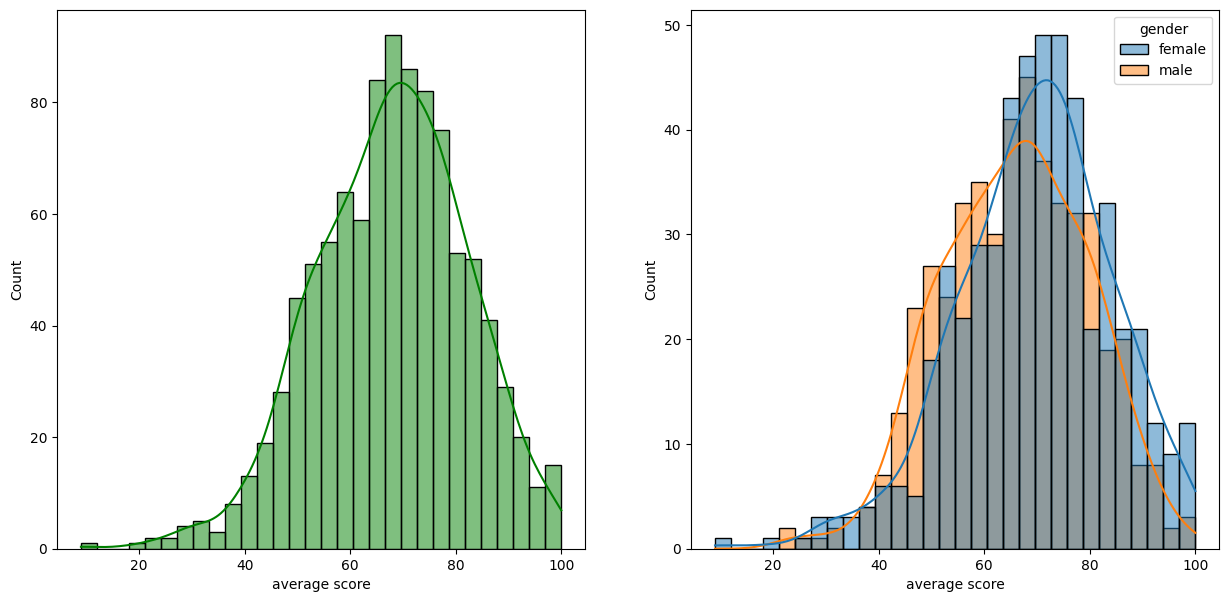

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="average score", bins=30, kde=True, color="g")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="average score", bins=30, kde=True, hue="gender")
plt.show()

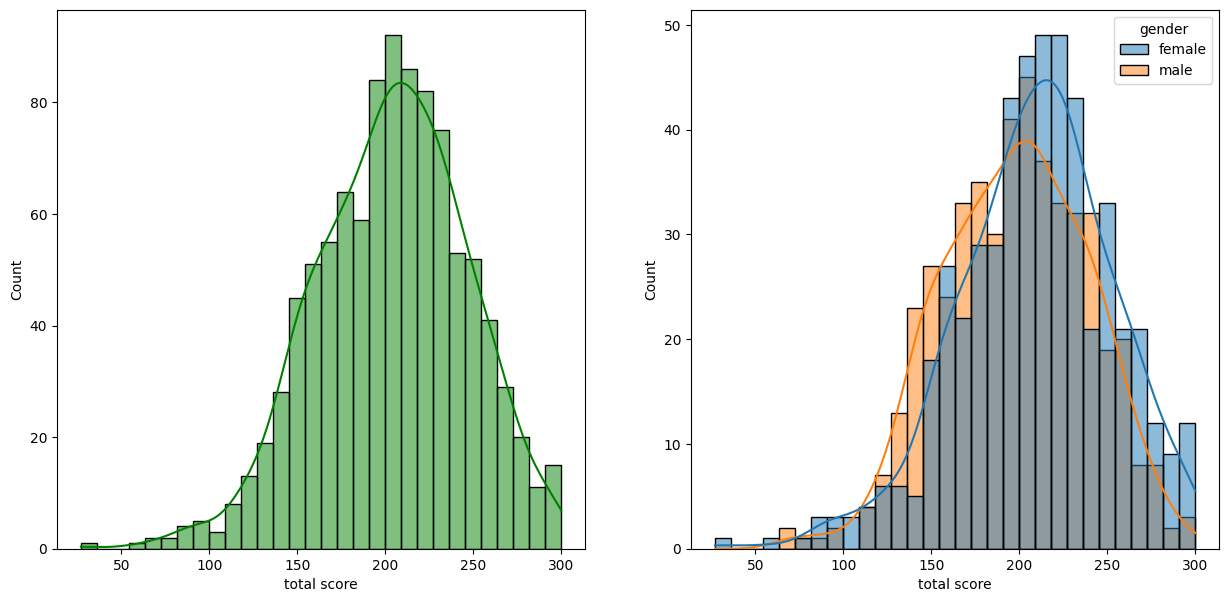

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="total score", bins=30, kde=True, color="g")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="total score", bins=30, kde=True, hue="gender")
plt.show()

**Insights**
- Female students tend to perform better than male students

##### Does Lunch matters?

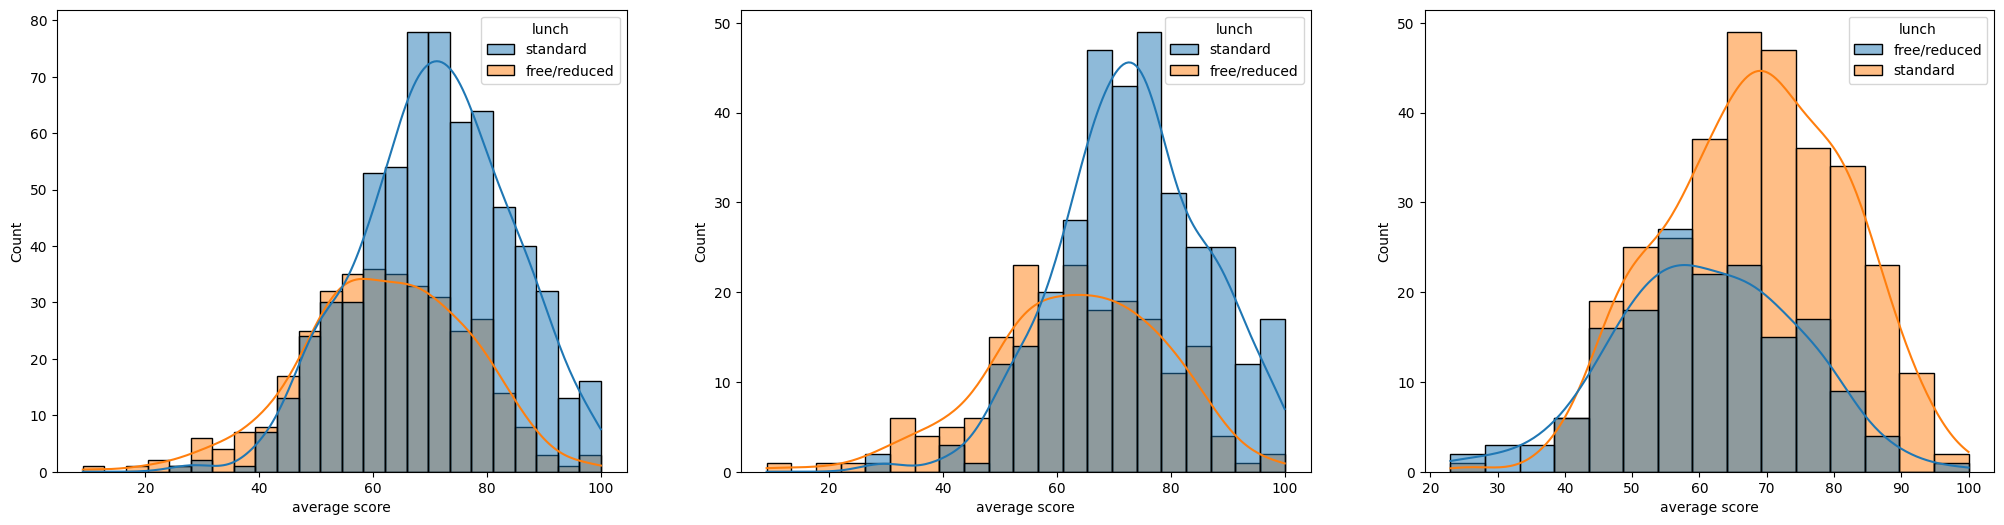

In [38]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="average score", kde=True, hue="lunch")
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == "female"], x="average score", kde=True, hue="lunch")
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == "male"], x="average score", kde=True, hue="lunch")
plt.show()

**Insights**
- Regardless of gender having standard lunch helps perform well in exams.

##### Does Education of parents matters?

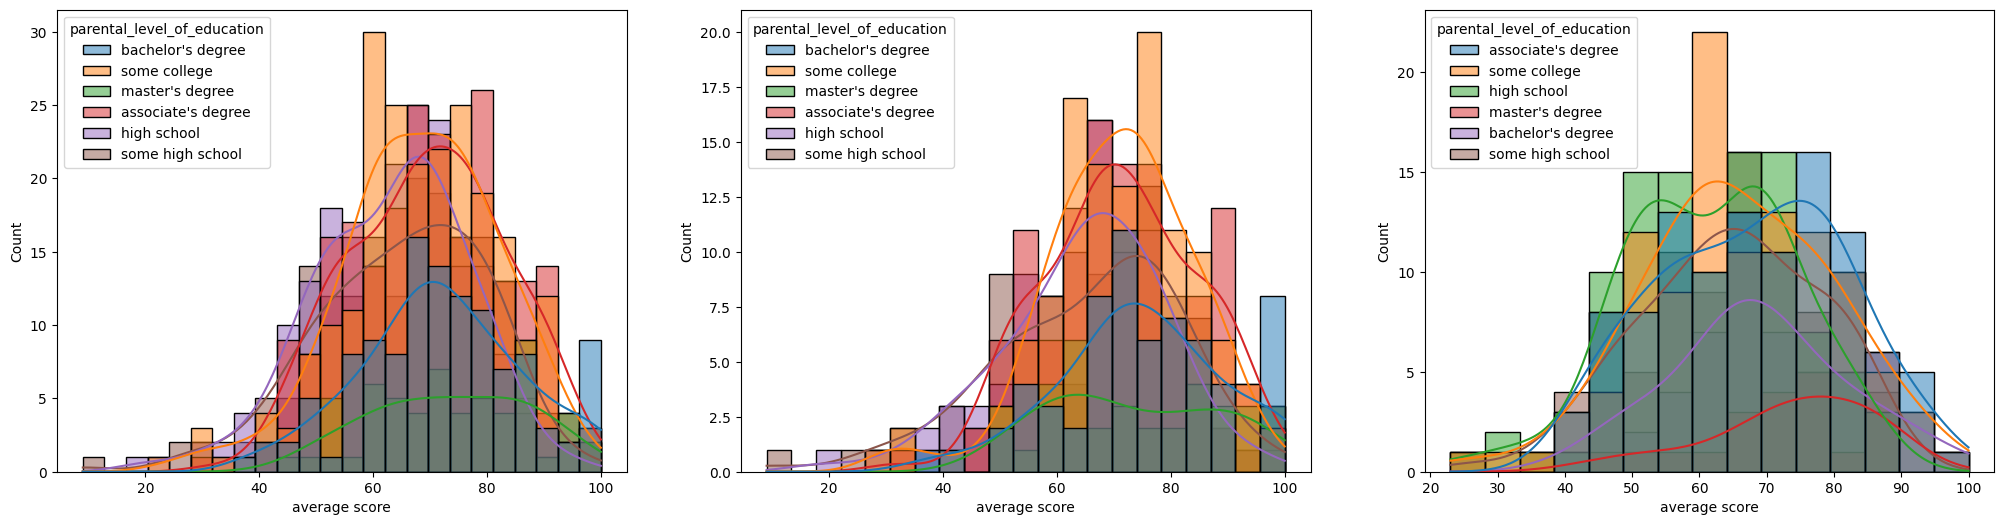

In [40]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="average score", kde=True, hue="parental_level_of_education")
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == "female"], x="average score", kde=True, hue="parental_level_of_education")
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == "male"], x="average score", kde=True, hue="parental_level_of_education")
plt.show()

**Insights**
- There is a light to no tilt for students with high parental level of education.
- It is higher for males

##### Does Race matters?

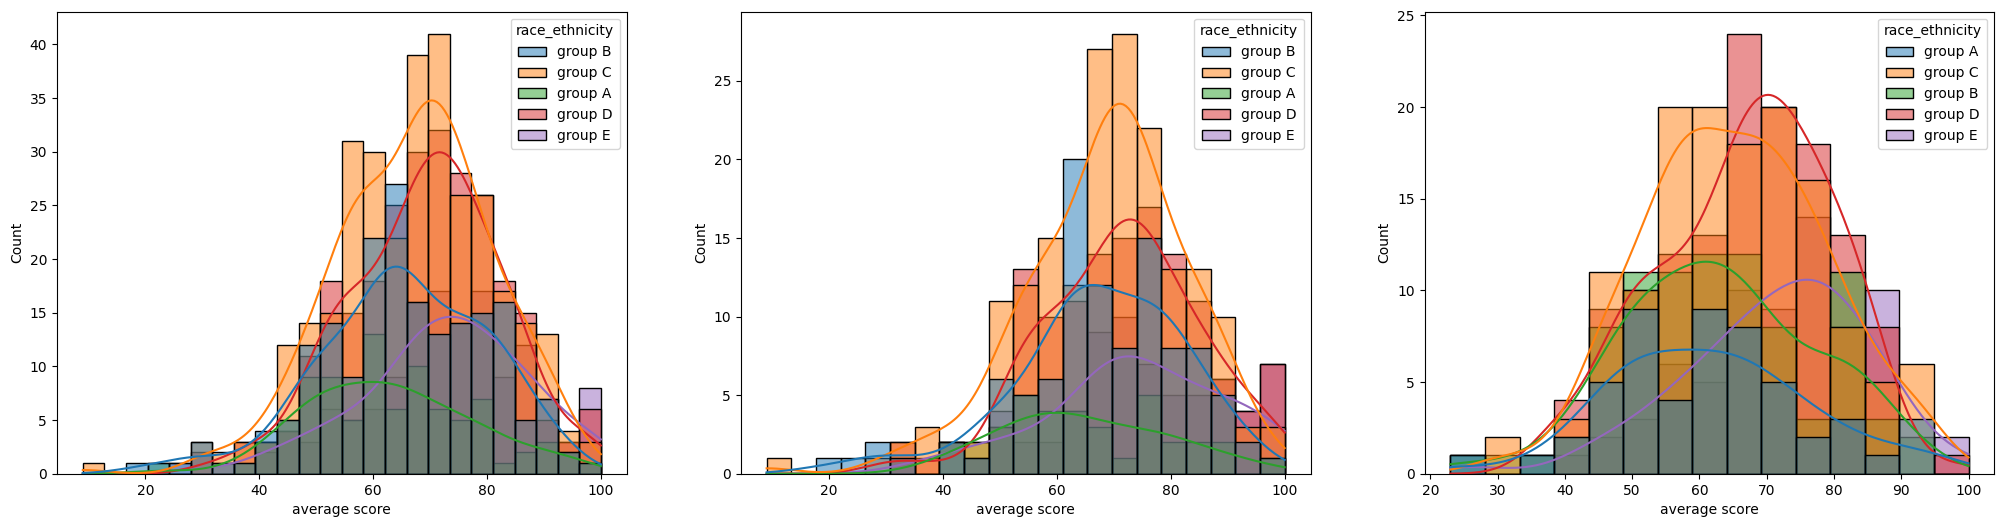

In [43]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average score', kde=True, hue='race_ethnicity')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == "female"], x='average score', kde=True, hue='race_ethnicity')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == "male"], x='average score', kde=True, hue='race_ethnicity')
plt.show()

**Insights**
- Race `group A` seems to have lower scores than other groups in average. `group B` also seems to be low
- Race `group E` seems to have highest scores than other groups in average.

#### 4.2 Maximum score of students in all three subjects

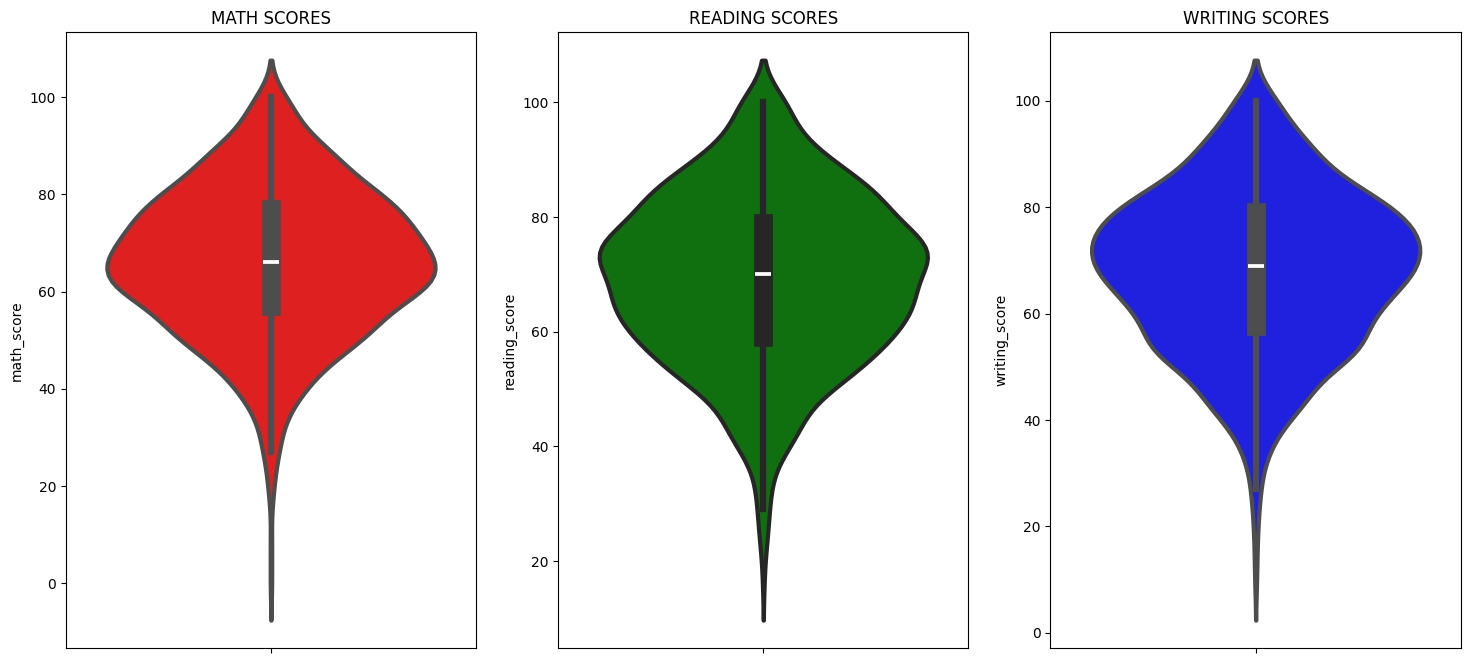

In [47]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.title("MATH SCORES")
sns.violinplot(y="math_score", data=df, color="red", linewidth=3)
plt.subplot(1, 3, 2)
plt.title("READING SCORES")
sns.violinplot(y="reading_score", data=df, color="green", linewidth=3)
plt.subplot(1, 3, 3)
plt.title("WRITING SCORES")
sns.violinplot(y="writing_score", data=df, color="blue", linewidth=3)
plt.show()

**Insights**
- It seems that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score between 50-80.

#### 4.3 Multivariate analysis using pieplot

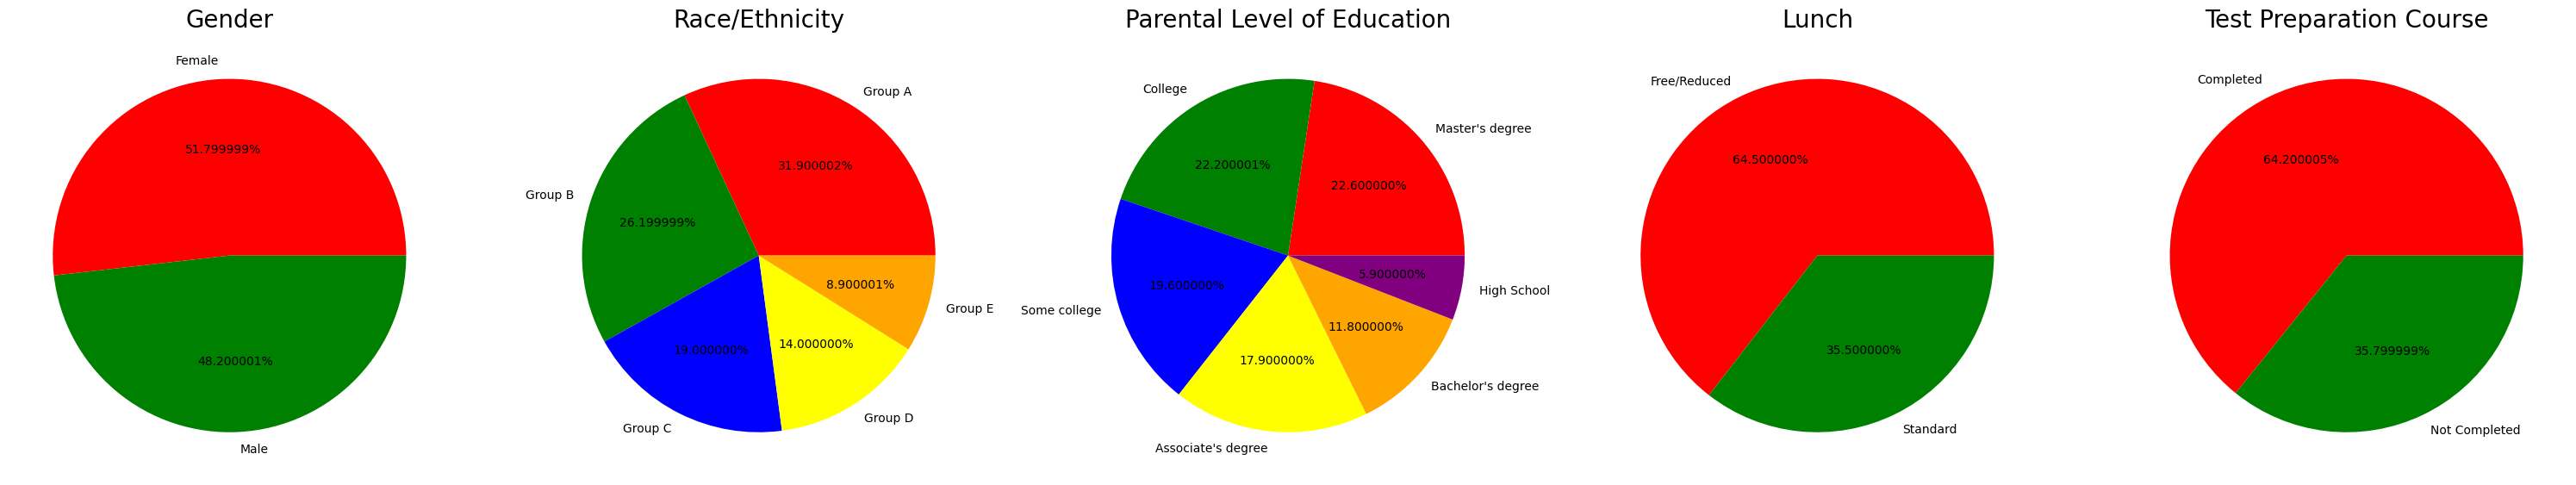

In [52]:
plt.rcParams["figure.figsize"] = (30, 12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = ["Female", "Male"]
color = ["red", "green"]


plt.pie(size, labels=labels, autopct="%2f%%", colors=color)
plt.title("Gender", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 2)
size = df["race_ethnicity"].value_counts()
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]
color = ["red", "green", "blue", "yellow", "orange"]

plt.pie(size, labels=labels, autopct="%2f%%", colors=color)
plt.title("Race/Ethnicity", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 3)
size = df["parental_level_of_education"].value_counts()
labels = ["Master's degree", "College", "Some college", "Associate's degree", "Bachelor's degree", "High School"]
color = ["red", "green", "blue", "yellow", "orange", "purple"]

plt.pie(size, labels=labels, autopct="%2f%%", colors=color)
plt.title("Parental Level of Education", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 4)
size = df["lunch"].value_counts()
labels = ["Free/Reduced", "Standard"]
color = ["red", "green"]

plt.pie(size, labels=labels, autopct="%2f%%", colors=color)
plt.title("Lunch", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 5)
size = df["test_preparation_course"].value_counts()
labels = ["Completed", "Not Completed"]
color = ["red", "green"]

plt.pie(size, labels=labels, autopct="%2f%%", colors=color)
plt.title("Test Preparation Course", fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.grid()

plt.show()


**Insights**
- Ratio of Female and Male are almost equal
- Students of group A seems to be greater
- Most of the students have parental level of education of Master's degree
- Most students seems to have free/reduced lunch
- Most students seems to have completed test preparation course

#### 4.4 Feature Wise Visualization

#### 4.4.1 Gender Column
- How is distribution of gender?
- Is gender has any impact on student's performance?

##### UNIVARIATE ANALYSIS ( How is distribution of Gender? )

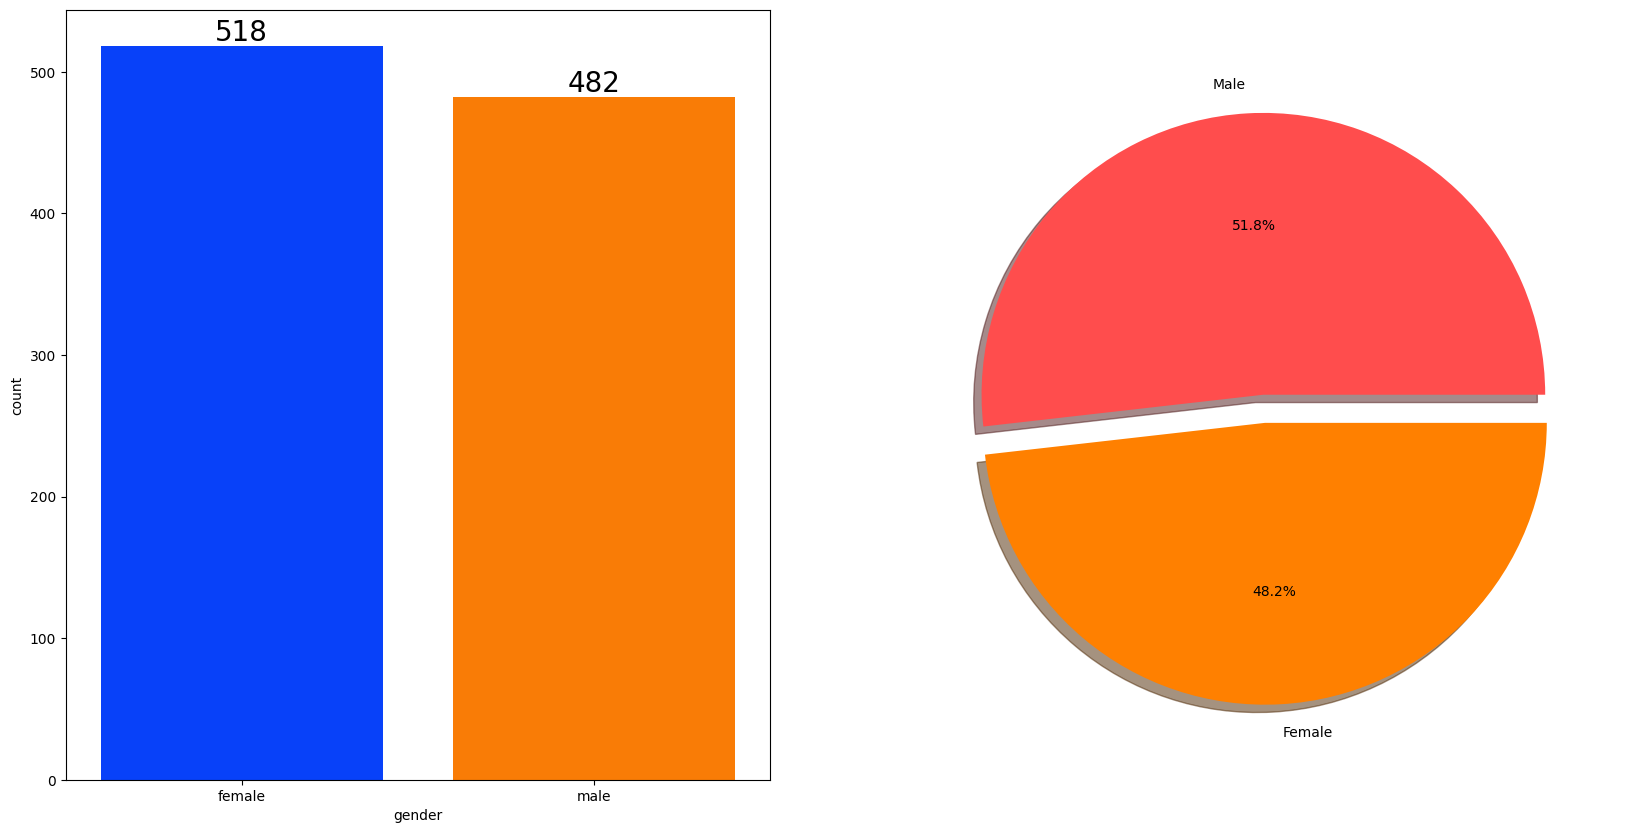

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

##### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [62]:
gender_group = df.groupby('gender')[numeric_features].mean()
gender_group

,math_score,reading_score,writing_score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


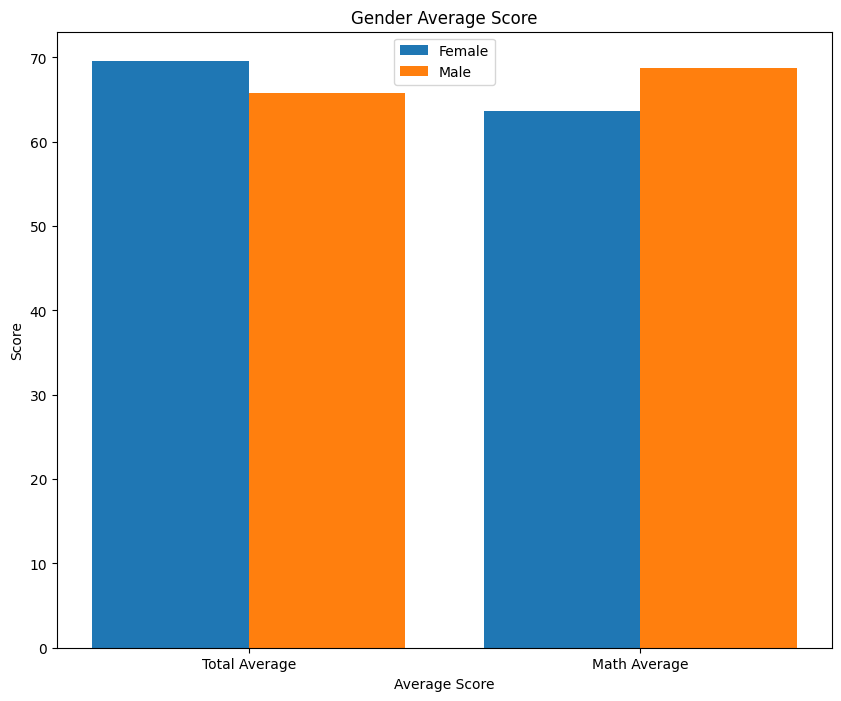

In [64]:
plt.figure(figsize=(10, 8))

X = ["Total Average", "Math Average"]

female_scores = [gender_group["average score"][0], gender_group["math_score"][0]]
male_scores = [gender_group["average score"][1], gender_group["math_score"][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, female_scores, 0.4, label="Female")
plt.bar(X_axis + 0.2, male_scores, 0.4, label="Male")

plt.xticks(X_axis, X)
plt.xlabel("Average Score")
plt.ylabel("Score")
plt.title("Gender Average Score")
plt.legend()
plt.show()

**Insights**
- On an average females have better overall score than men
- But males have better performance in math.

#### 4.4.2 Race/Ethnicity column
- How is Group wise distribution?
- Is Race/Ethnicity has any impact on student's performance?

##### UNIVARIATE ANALYSIS ( How is Group wise distribution? )

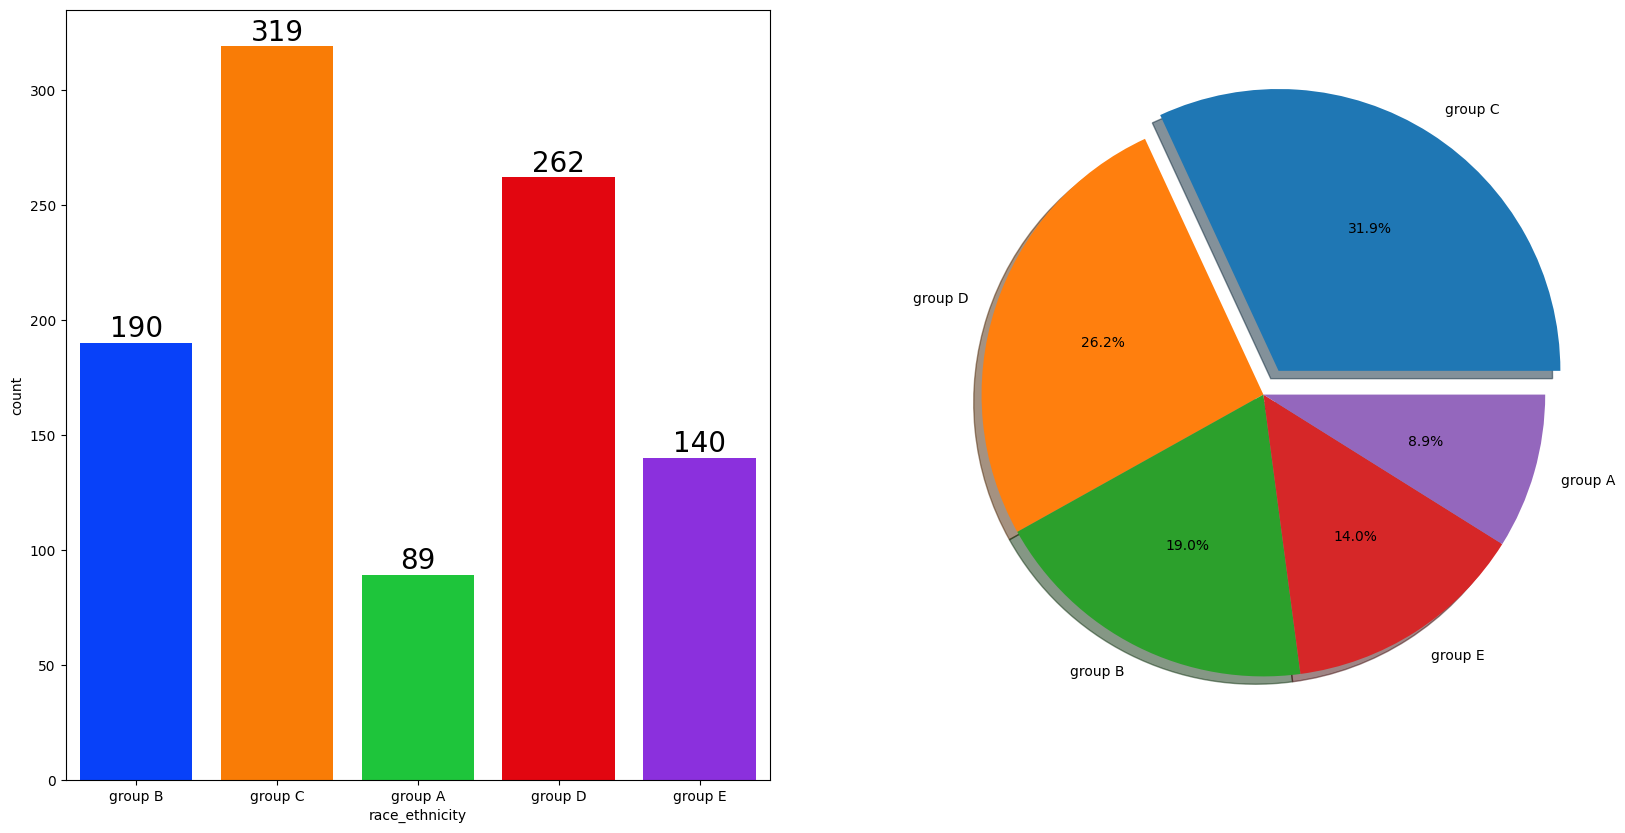

In [71]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data=df, x='race_ethnicity', ax=ax[0], palette="bright", saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, autopct='%1.1f%%', explode=[0.1, 0, 0, 0, 0], shadow=True)
plt.show()

**Insights**
- Most of the students are from group C then group D
- Lowest number of students belong to group A.

##### BIVARIATE ANALYSIS (Is Race/Ethnicity has any impact on student's performance?)

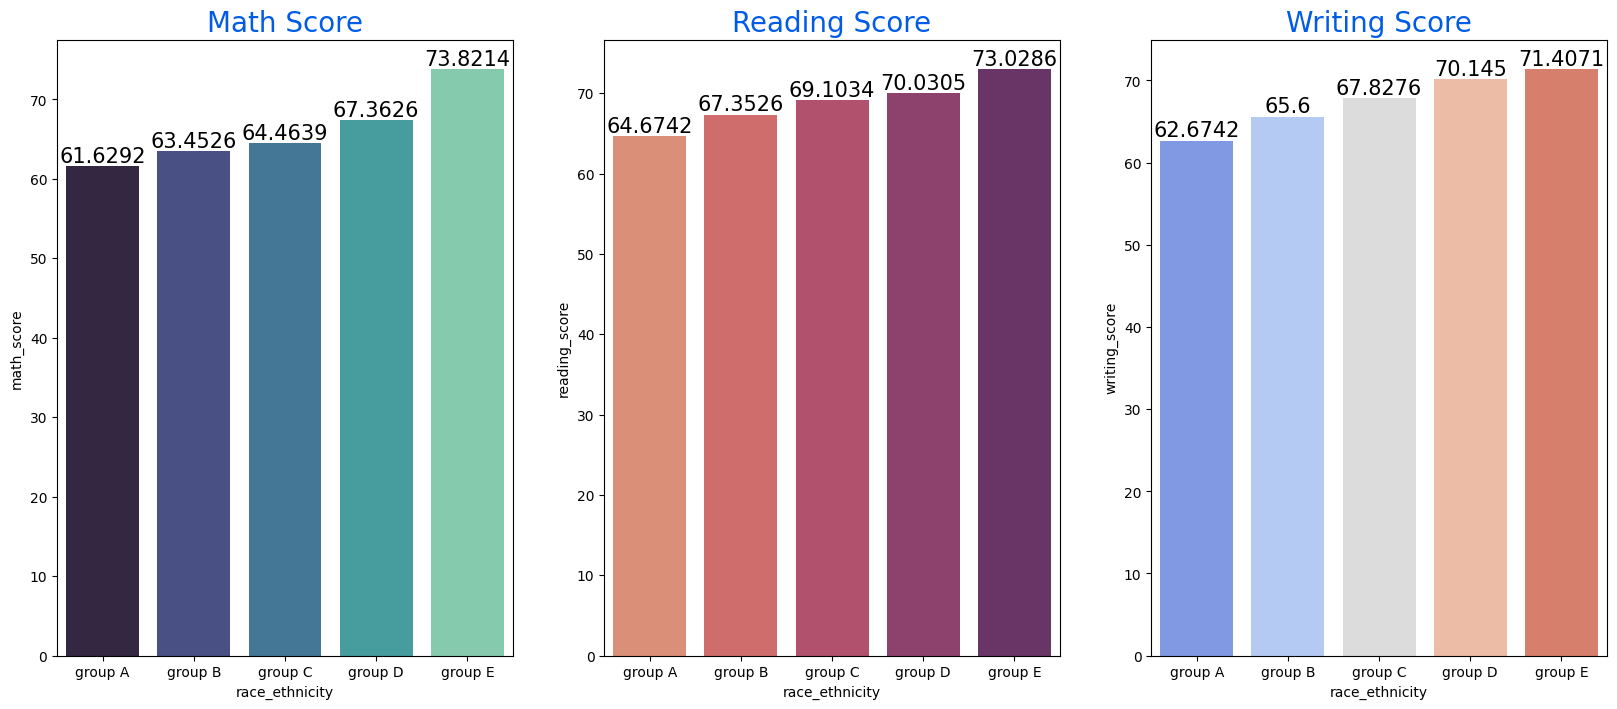

In [72]:
Groupdata2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=Groupdata2["math_score"].mean().index, y=Groupdata2["math_score"].mean(), palette="mako", ax=ax[0])
ax[0].set_title("Math Score", color="#005ce6", size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=15)

sns.barplot(x=Groupdata2["reading_score"].mean().index, y=Groupdata2["reading_score"].mean(), palette="flare", ax=ax[1])
ax[1].set_title("Reading Score", color="#005ce6", size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color="black", size=15)

sns.barplot(x=Groupdata2["writing_score"].mean().index, y=Groupdata2["writing_score"].mean(), palette="coolwarm", ax=ax[2])
ax[2].set_title("Writing Score", color="#005ce6", size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color="black", size=15)
    
plt.show()

**Insights**
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- (Assuming ABCDE being the direction from lower to higher socioeconomic class) Students from a lower Socioeconomic status have a lower avg in all course subjects.

#### 4.4.3 Parental Level of Education Column
- What is educational background of students's parent?
- Does parental education has any impact on student's performance?

##### UNIVARIATE ANALYSIS (What is educational background of student's parent?)

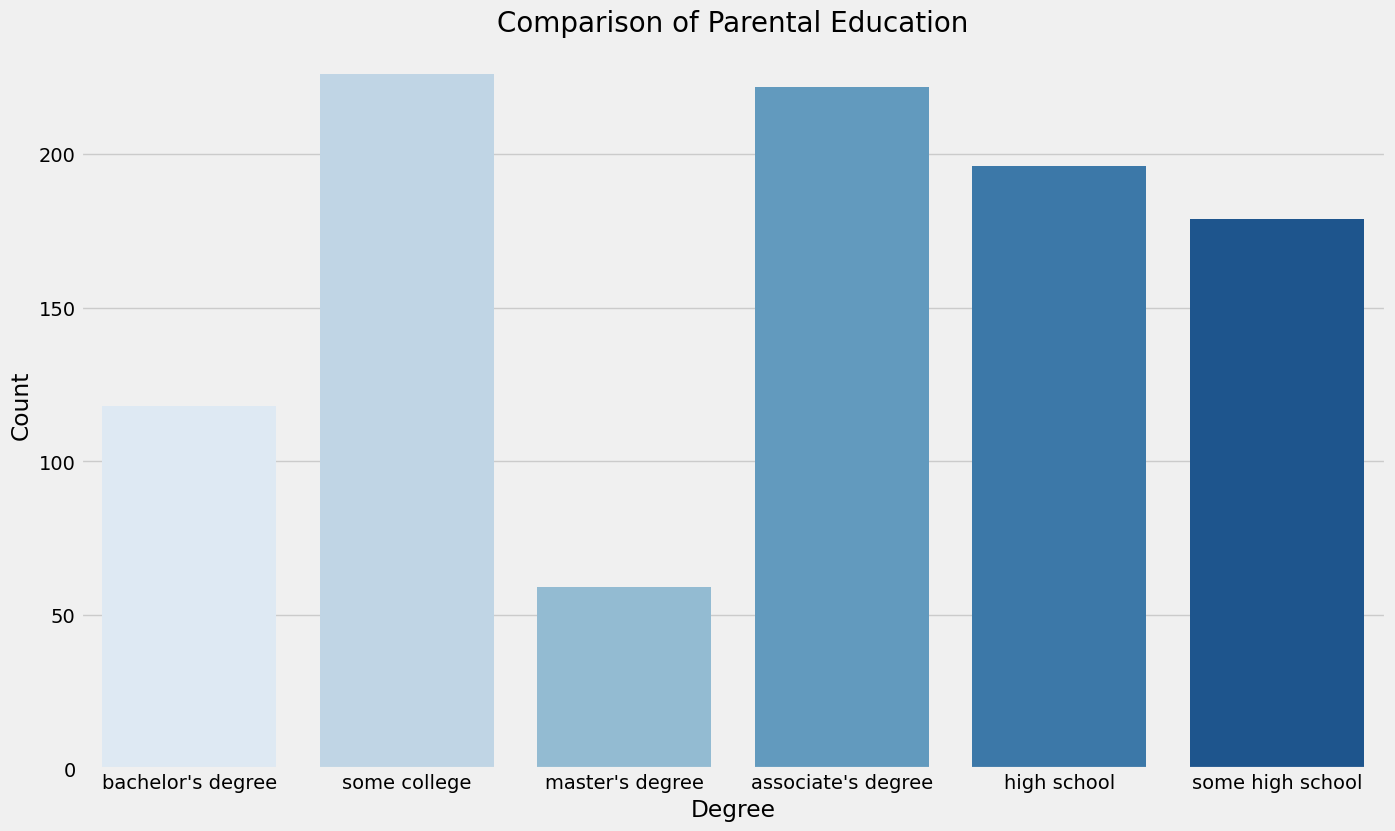

In [77]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x='parental_level_of_education', palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

**Insights**
- Largest number of parents are from some college.

##### BIVARIATE ANALYSIS (Does parental education has any impact on student's performance?)

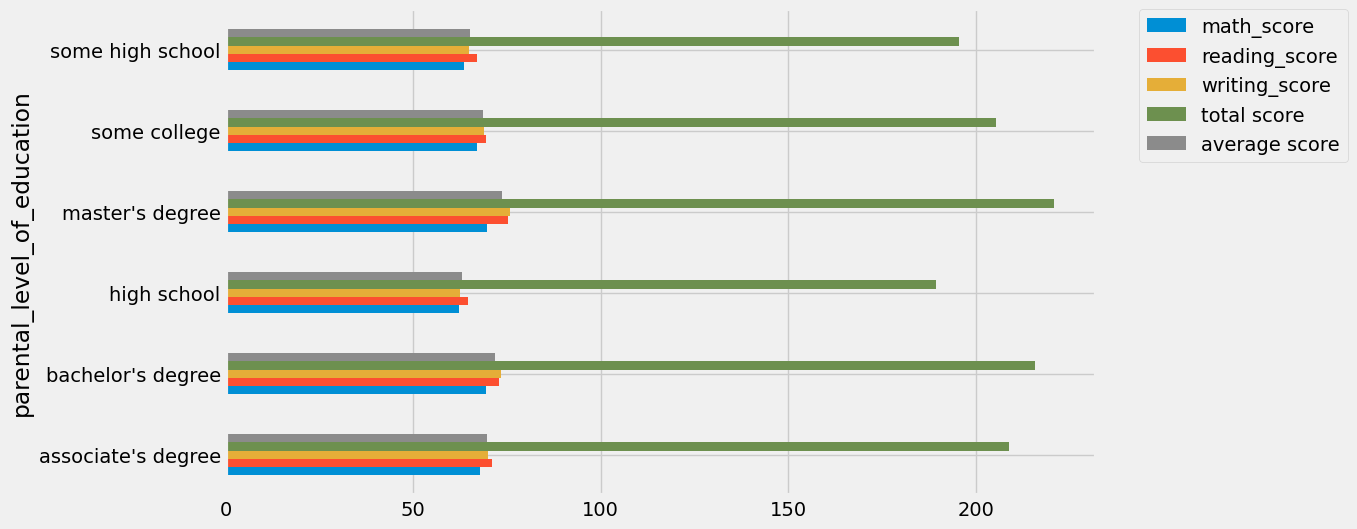

In [84]:
df.groupby('parental_level_of_education')[numeric_features].agg("mean").plot(kind='barh', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
- The score of student with parental level of education master and bachelor is higher.

#### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

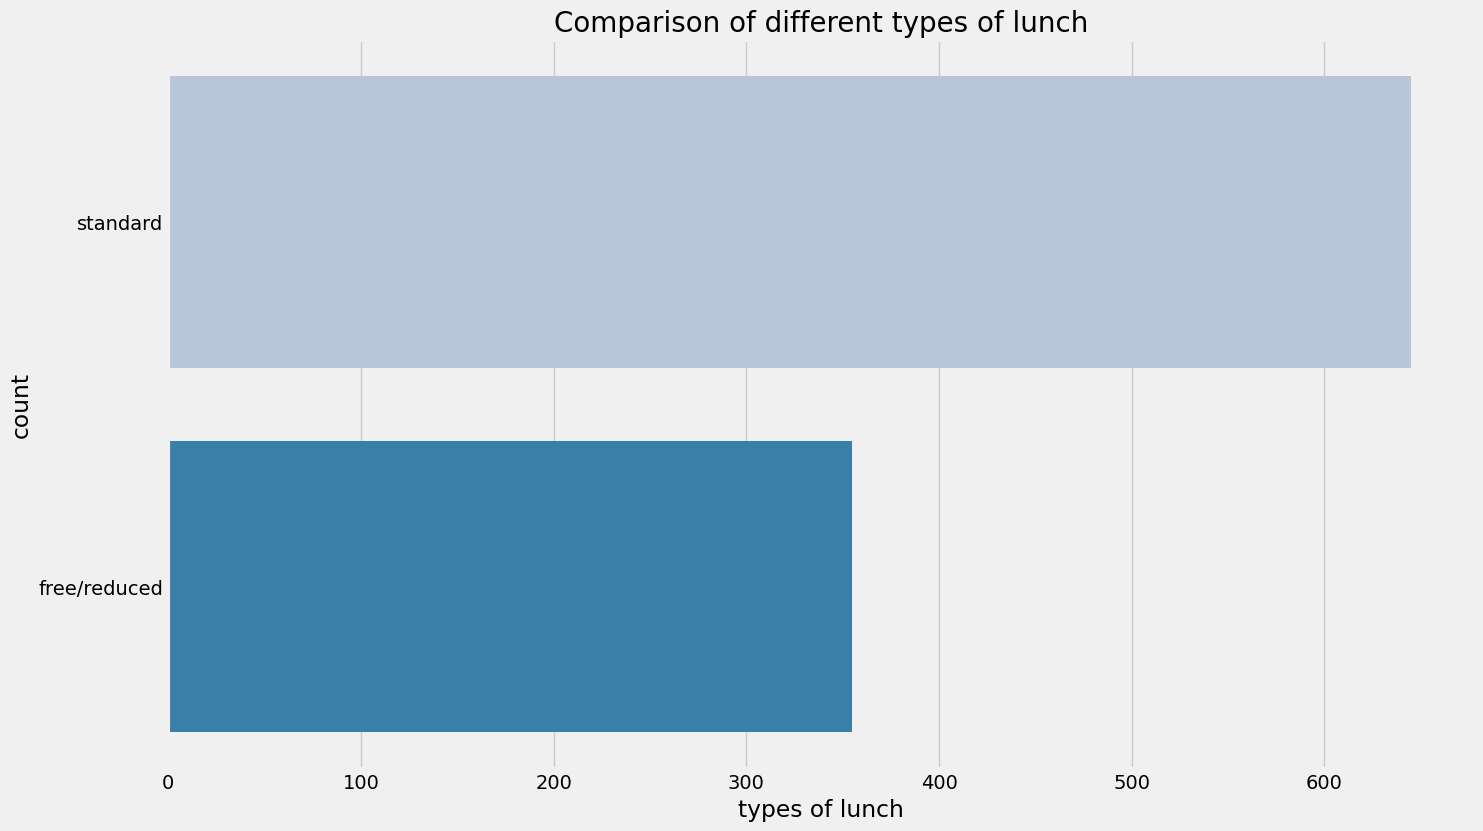

In [89]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Insights**
- Students being served Standard lunch was more than free lunch

##### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

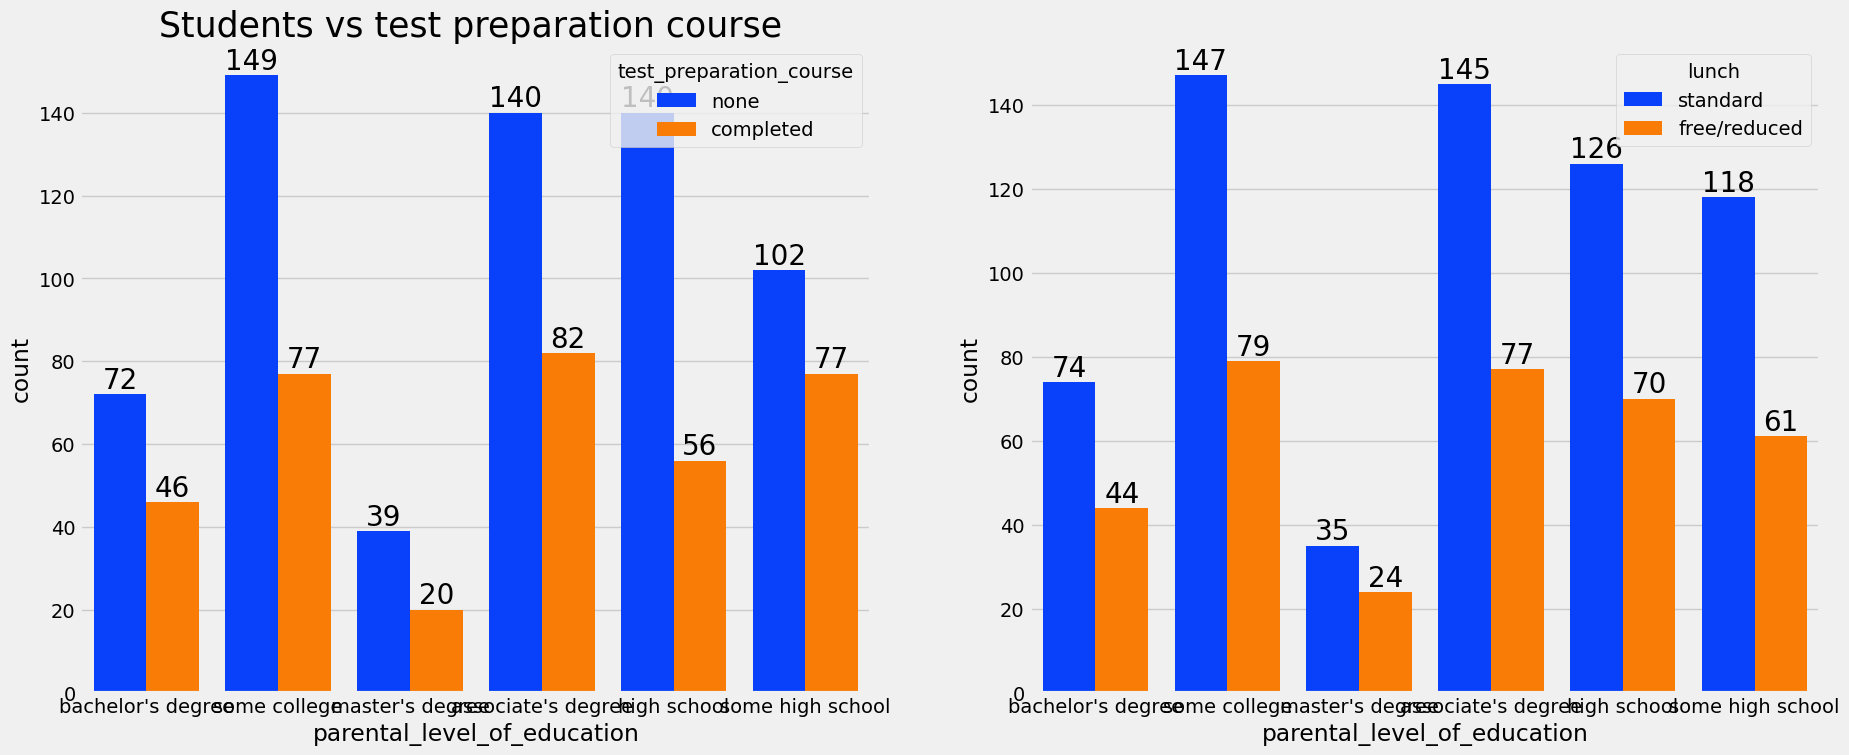

In [91]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   
plt.show()

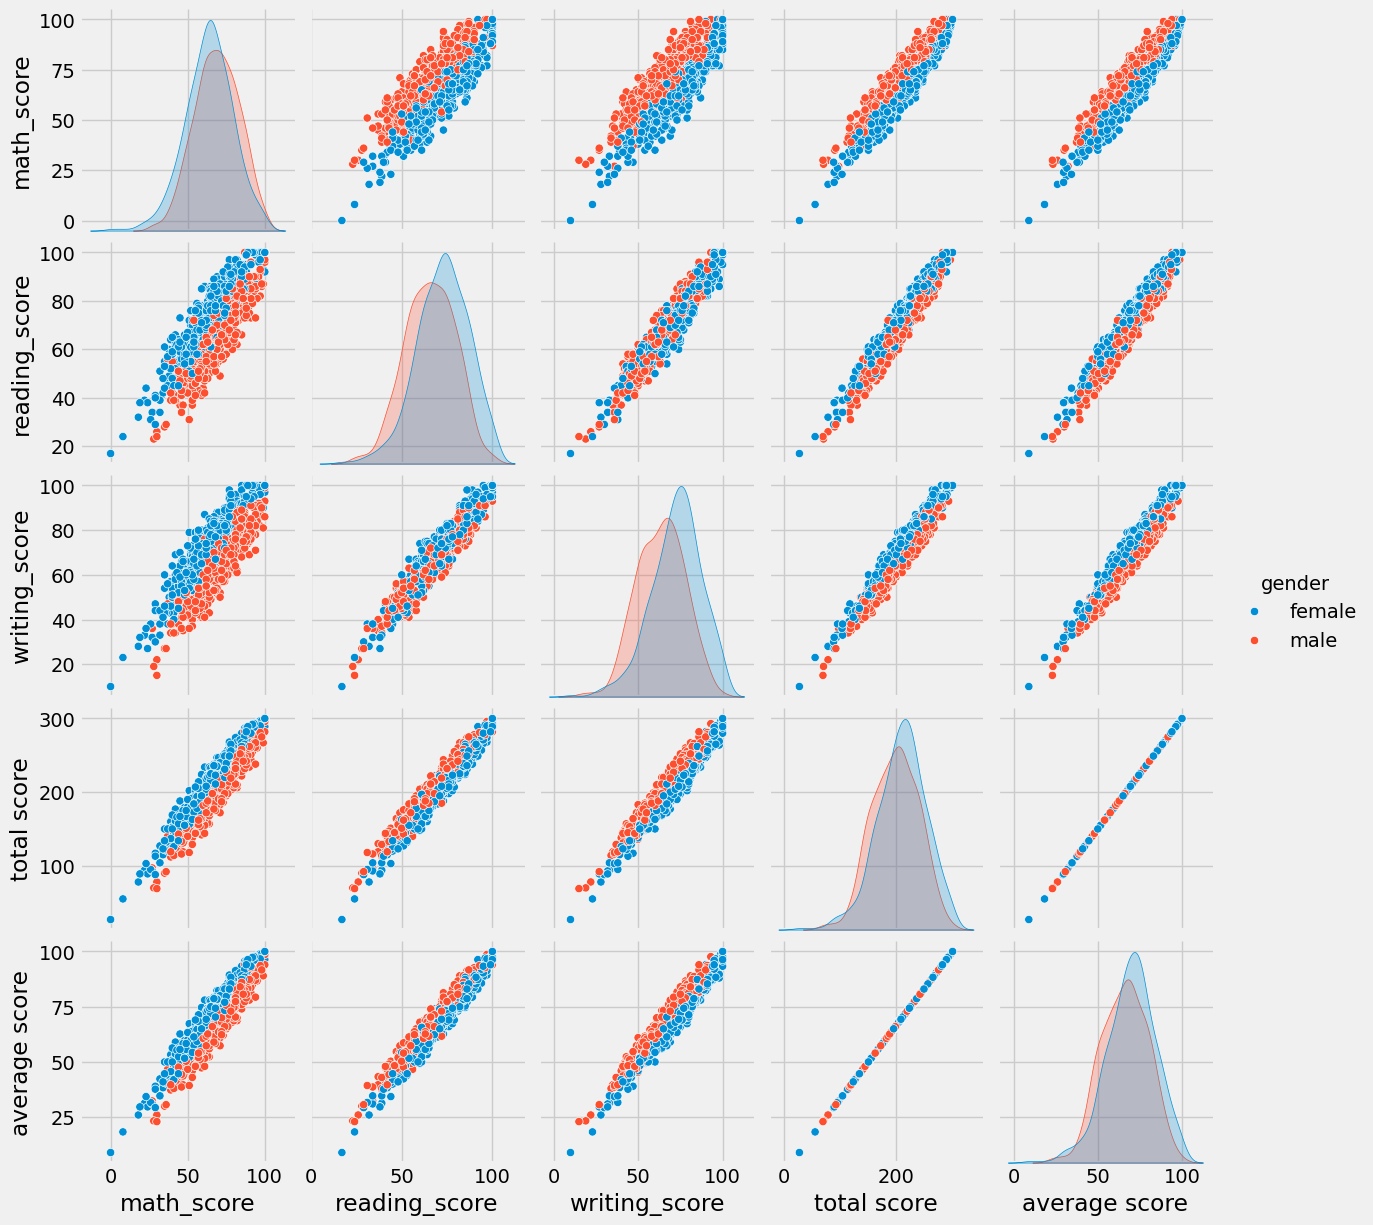

In [92]:
sns.pairplot(df,hue = 'gender')
plt.show()